In [1]:
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/03 17:52:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
type(sc)

pyspark.context.SparkContext

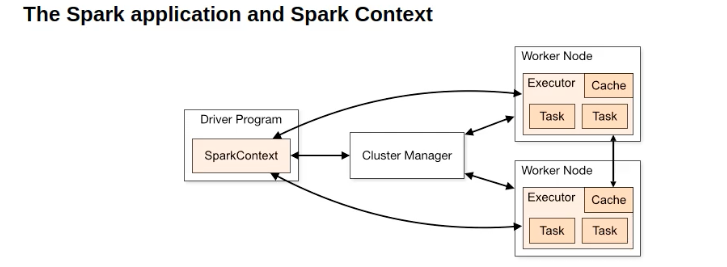

### RDD
immutable! dataframes also immutable

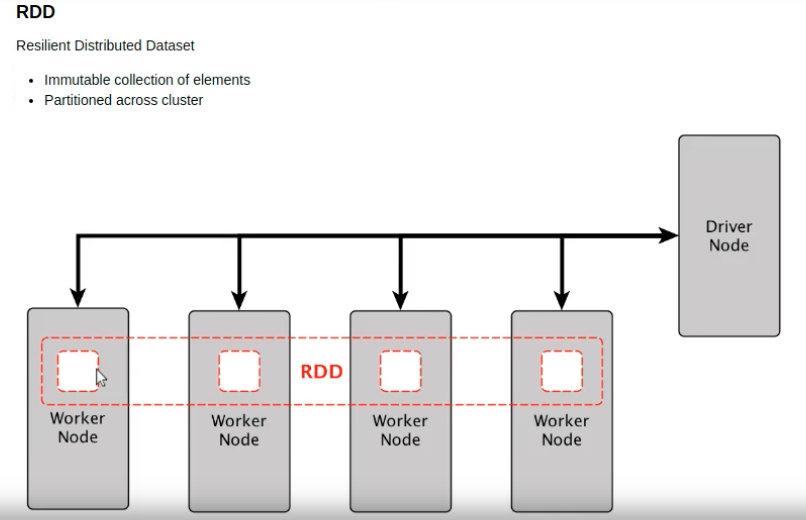

**Interations**: transformations are lazy until actions are called.

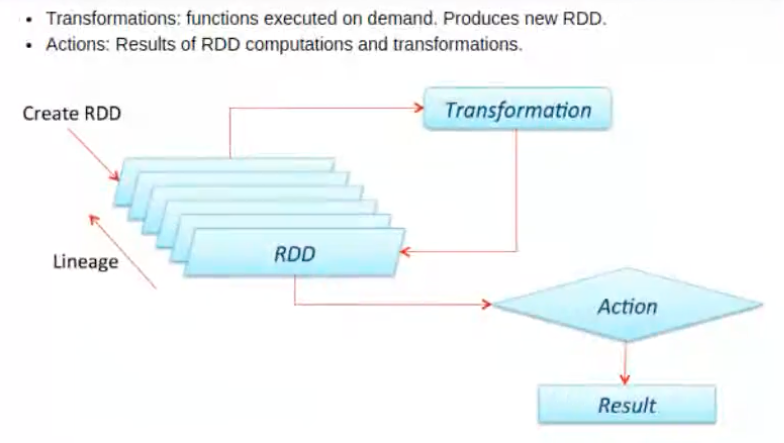

In [3]:
data = range(5)

rdd = sc.parallelize(data)
rdd

PythonRDD[1] at RDD at PythonRDD.scala:53

In [4]:
paths = [
    'TSLA.csv',
    'GOOG.csv',
    'AMZN.csv'
]

tsla = 'TSLA.csv'
tsla_rdd = sc.textFile(tsla)
tsla_rdd.take(5)

['Date,Open,High,Low,Close,AdjClose,Volume',
 '2019-07-15,248.000000,254.419998,244.860001,253.500000,253.500000,11000100',
 '2019-07-16,249.300003,253.529999,247.929993,252.380005,252.380005,8149000',
 '2019-07-17,255.669998,258.309998,253.350006,254.860001,254.860001,9764700',
 '2019-07-18,255.050003,255.750000,251.889999,253.539993,253.539993,4764500']

In [5]:
transform_tsla_rdd = tsla_rdd.map(lambda x: x.split(','))
transform_tsla_rdd

PythonRDD[5] at RDD at PythonRDD.scala:53

In [6]:
transform_tsla_rdd.take(3)

[['Date', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume'],
 ['2019-07-15',
  '248.000000',
  '254.419998',
  '244.860001',
  '253.500000',
  '253.500000',
  '11000100'],
 ['2019-07-16',
  '249.300003',
  '253.529999',
  '247.929993',
  '252.380005',
  '252.380005',
  '8149000']]

## Spark dataframes

In [7]:
from pyspark.sql import SQLContext

sqlc = SQLContext(sc)

/Users/clairegong/Library/Python/3.9/lib/python/site-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [8]:
li = [('alice', 18), ('john', 23)]
df = sqlc.createDataFrame(li, ['name', 'age'])
df.collect()

[Row(name='alice', age=18), Row(name='john', age=23)]

In [9]:
tsla_df = transform_tsla_rdd.toDF(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume'])
tsla_df.take(5)

[Row(date='Date', open='Open', high='High', low='Low', close='Close', adjclose='AdjClose', volume='Volume'),
 Row(date='2019-07-15', open='248.000000', high='254.419998', low='244.860001', close='253.500000', adjclose='253.500000', volume='11000100'),
 Row(date='2019-07-16', open='249.300003', high='253.529999', low='247.929993', close='252.380005', adjclose='252.380005', volume='8149000'),
 Row(date='2019-07-17', open='255.669998', high='258.309998', low='253.350006', close='254.860001', adjclose='254.860001', volume='9764700'),
 Row(date='2019-07-18', open='255.050003', high='255.750000', low='251.889999', close='253.539993', adjclose='253.539993', volume='4764500')]

In [10]:
tesla_df = sqlc.read.load('TSLA.csv',
                                 format='com.databricks.spark.csv',
                                 header='true',
                                 inferSchema='true')

google_df = sqlc.read.load('GOOG.csv',
                                 format='com.databricks.spark.csv',
                                 header='true',
                                 inferSchema='true')


amazon_df = sqlc.read.load('AMZN.csv',
                                 format='com.databricks.spark.csv',
                                 header='true',
                                 inferSchema='true')
amazon_df.take(5)

[Row(Date=datetime.date(2019, 7, 15), Open=2021.400024, High=2022.900024, Low=2001.550049, Close=2020.98999, AdjClose=2020.98999, Volume=2981300),
 Row(Date=datetime.date(2019, 7, 16), Open=2010.579956, High=2026.319946, Low=2001.219971, Close=2009.900024, AdjClose=2009.900024, Volume=2618200),
 Row(Date=datetime.date(2019, 7, 17), Open=2007.050049, High=2012.0, Low=1992.030029, Close=1992.030029, AdjClose=1992.030029, Volume=2558800),
 Row(Date=datetime.date(2019, 7, 18), Open=1980.01001, High=1987.5, Low=1951.550049, Close=1977.900024, AdjClose=1977.900024, Volume=3504300),
 Row(Date=datetime.date(2019, 7, 19), Open=1991.209961, High=1996.0, Low=1962.22998, Close=1964.52002, AdjClose=1964.52002, Volume=3185600)]

In [11]:
google_df.take(5)

[Row(Date=datetime.date(2019, 7, 15), Open=1146.859985, High=1150.819946, Low=1139.400024, Close=1150.339966, AdjClose=1150.339966, Volume=903800),
 Row(Date=datetime.date(2019, 7, 16), Open=1146.0, High=1158.579956, Low=1145.0, Close=1153.579956, AdjClose=1153.579956, Volume=1238800),
 Row(Date=datetime.date(2019, 7, 17), Open=1150.969971, High=1158.359985, Low=1145.77002, Close=1146.349976, AdjClose=1146.349976, Volume=1170000),
 Row(Date=datetime.date(2019, 7, 18), Open=1141.73999, High=1147.60498, Low=1132.72998, Close=1146.329956, AdjClose=1146.329956, Volume=1291300),
 Row(Date=datetime.date(2019, 7, 19), Open=1148.189941, High=1151.140015, Low=1129.619995, Close=1130.099976, AdjClose=1130.099976, Volume=1647200)]

In [12]:
amazon_df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- AdjClose: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [13]:
amazon_df.count()

253

In [14]:
amazon_df.show()

+----------+-----------+-----------+-----------+-----------+-----------+-------+
|      Date|       Open|       High|        Low|      Close|   AdjClose| Volume|
+----------+-----------+-----------+-----------+-----------+-----------+-------+
|2019-07-15|2021.400024|2022.900024|2001.550049| 2020.98999| 2020.98999|2981300|
|2019-07-16|2010.579956|2026.319946|2001.219971|2009.900024|2009.900024|2618200|
|2019-07-17|2007.050049|     2012.0|1992.030029|1992.030029|1992.030029|2558800|
|2019-07-18| 1980.01001|     1987.5|1951.550049|1977.900024|1977.900024|3504300|
|2019-07-19|1991.209961|     1996.0| 1962.22998| 1964.52002| 1964.52002|3185600|
|2019-07-22|1971.140015|     1989.0| 1958.26001|1985.630005|1985.630005|2900000|
|2019-07-23| 1995.98999|1997.790039|1973.130005| 1994.48999| 1994.48999|2703500|
|2019-07-24|1969.300049|2001.300049|1965.869995|2000.810059|2000.810059|2631300|
|2019-07-25|     2001.0|2001.199951|1972.719971|1973.819946|1973.819946|4136500|
|2019-07-26|     1942.0|1950

In [15]:
import pandas as pd

amazon_df.toPandas()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2019-07-15,2021.400024,2022.900024,2001.550049,2020.989990,2020.989990,2981300
1,2019-07-16,2010.579956,2026.319946,2001.219971,2009.900024,2009.900024,2618200
2,2019-07-17,2007.050049,2012.000000,1992.030029,1992.030029,1992.030029,2558800
3,2019-07-18,1980.010010,1987.500000,1951.550049,1977.900024,1977.900024,3504300
4,2019-07-19,1991.209961,1996.000000,1962.229980,1964.520020,1964.520020,3185600
...,...,...,...,...,...,...,...
248,2020-07-08,3022.610107,3083.969971,3012.429932,3081.110107,3081.110107,5037600
249,2020-07-09,3115.989990,3193.879883,3074.000000,3182.629883,3182.629883,6388700
250,2020-07-10,3191.760010,3215.000000,3135.699951,3200.000000,3200.000000,5486000
251,2020-07-13,3251.060059,3344.290039,3068.389893,3104.000000,3104.000000,7689300


## Explore and query
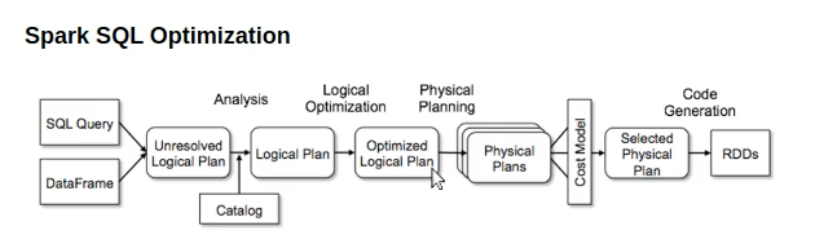

In [16]:
from pyspark.sql.functions import year, month

# google_df.select('Date', 'Close').show(5)
google_df.select(year('Date').alias('year'), 'Close').groupby('year').avg().show(5)

+----+---------+------------------+
|year|avg(year)|        avg(Close)|
+----+---------+------------------+
|2019|   2019.0|1245.3833654621849|
|2020|   2020.0|1362.8286906865671|
+----+---------+------------------+



In [17]:
google_df.select(year('date').alias('year'), 
                 month('date').alias('month'), 
                 'close', 
                 'adjclose')\
                    .groupby('year', 'month')\
                        .avg('close')\
                        .sort('year', 'month')\
                            .show()

+----+-----+------------------+
|year|month|        avg(close)|
+----+-----+------------------+
|2019|    7|1170.1961483076923|
|2019|    8|1180.6868120454546|
|2019|    9|     1220.83952035|
|2019|   10|1232.7117442608696|
|2019|   11|     1304.27899165|
|2019|   12|1340.8676351904762|
|2020|    1|1436.6537968571424|
|2020|    2|1464.1105184736841|
|2020|    3|1188.3940984545457|
|2020|    4|1234.1404797142854|
|2020|    5|1381.1137511999998|
|2020|    6|1431.0477184545452|
|2020|    7|1496.0299885555555|
+----+-----+------------------+



In [18]:
google_df.select(year('date').alias('year'), 
                 month('date').alias('month'), 
                 'close', 
                 'adjclose')\
                    .groupby('year', 'month')\
                        .avg('close')\
                        .sort('year', 'month')\
                            .explain(extended=True)

== Parsed Logical Plan ==
'Sort ['year ASC NULLS FIRST, 'month ASC NULLS FIRST], true
+- Aggregate [year#263, month#264], [year#263, month#264, avg(close#70) AS avg(close)#274]
   +- Project [year(date#66) AS year#263, month(date#66) AS month#264, close#70, adjclose#71]
      +- Relation [Date#66,Open#67,High#68,Low#69,Close#70,AdjClose#71,Volume#72] csv

== Analyzed Logical Plan ==
year: int, month: int, avg(close): double
Sort [year#263 ASC NULLS FIRST, month#264 ASC NULLS FIRST], true
+- Aggregate [year#263, month#264], [year#263, month#264, avg(close#70) AS avg(close)#274]
   +- Project [year(date#66) AS year#263, month(date#66) AS month#264, close#70, adjclose#71]
      +- Relation [Date#66,Open#67,High#68,Low#69,Close#70,AdjClose#71,Volume#72] csv

== Optimized Logical Plan ==
Sort [year#263 ASC NULLS FIRST, month#264 ASC NULLS FIRST], true
+- Aggregate [year#263, month#264], [year#263, month#264, avg(close#70) AS avg(close)#274]
   +- Project [year(date#66) AS year#263, month(da

## SPARK SQL

In [19]:
amazon_df.registerTempTable('amazon')
tesla_df.registerTempTable('tesla')
google_df.registerTempTable('google')

/Users/clairegong/Library/Python/3.9/lib/python/site-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [20]:
sqlc.sql('select * from google').show(5)

+----------+-----------+-----------+-----------+-----------+-----------+-------+
|      Date|       Open|       High|        Low|      Close|   AdjClose| Volume|
+----------+-----------+-----------+-----------+-----------+-----------+-------+
|2019-07-15|1146.859985|1150.819946|1139.400024|1150.339966|1150.339966| 903800|
|2019-07-16|     1146.0|1158.579956|     1145.0|1153.579956|1153.579956|1238800|
|2019-07-17|1150.969971|1158.359985| 1145.77002|1146.349976|1146.349976|1170000|
|2019-07-18| 1141.73999| 1147.60498| 1132.72998|1146.329956|1146.329956|1291300|
|2019-07-19|1148.189941|1151.140015|1129.619995|1130.099976|1130.099976|1647200|
+----------+-----------+-----------+-----------+-----------+-----------+-------+
only showing top 5 rows



In [21]:
sqlc.sql('select year(date) as year, month(date) as month, avg(close) from tesla group by year, month order by avg(close) desc').show()

+----+-----+------------------+
|year|month|        avg(close)|
+----+-----+------------------+
|2020|    7|1378.7111273333333|
|2020|    6| 963.5422779545456|
|2020|    5|      799.42549745|
|2020|    2| 797.4468415263159|
|2020|    4| 663.5985761428572|
|2020|    3| 559.1013613181818|
|2020|    1| 528.6590503809524|
|2019|   12| 377.6947631904762|
|2019|   11|338.30000000000007|
|2019|   10| 266.3547840434783|
|2019|    7|248.43769253846148|
|2019|    9|237.26149830000003|
|2019|    8|225.10272704545451|
+----+-----+------------------+



In [27]:
query = '''select year(tesla.date) as year, month(tesla.date) as month, avg(tesla.close) as tesla, avg(amazon.close) as amazon, avg(google.close) as google
from tesla 
join amazon on tesla.date = amazon.date
join google on tesla.date = google.date
group by year, month
order by year, month
'''
join_df = sqlc.sql(query)
join_df.show()

+----+-----+------------------+------------------+------------------+
|year|month|             tesla|            amazon|            google|
+----+-----+------------------+------------------+------------------+
|2019|    7|248.43769253846148|1964.6846265384618|1170.1961483076923|
|2019|    8|225.10272704545451|1793.6027220909093|1180.6868120454546|
|2019|    9|237.26149830000003|     1799.12099615|     1220.83952035|
|2019|   10| 266.3547840434783|1752.3317498695653|1232.7117442608696|
|2019|   11|338.30000000000007|      1774.2939941|     1304.27899165|
|2019|   12| 377.6947631904762|1785.7728446190476|1340.8676351904762|
|2020|    1| 528.6590503809524|1884.2376128571425|1436.6537968571424|
|2020|    2| 797.4468415263159|2066.1752672631574|1464.1105184736841|
|2020|    3| 559.1013613181818|1872.3104358636365|1188.3940984545457|
|2020|    4| 663.5985761428572|2228.7052408571426|1234.1404797142854|
|2020|    5|      799.42549745|2394.1840209499996|1381.1137511999998|
|2020|    6| 963.542

## Parquet
storage by column, skip columns not in use

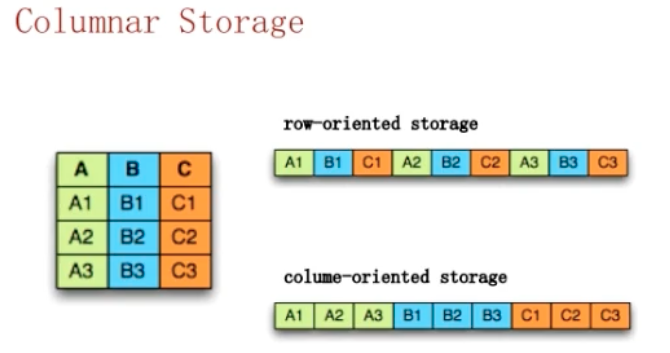

In [28]:
join_df.write.format('parquet').save('join_stocks.parquet')

In [29]:
df = sqlc.read.parquet('join_stocks.parquet')
df.show()

+----+-----+------------------+------------------+------------------+
|year|month|             tesla|            amazon|            google|
+----+-----+------------------+------------------+------------------+
|2019|    7|248.43769253846148|1964.6846265384618|1170.1961483076923|
|2019|    8|225.10272704545451|1793.6027220909093|1180.6868120454546|
|2019|    9|237.26149830000003|     1799.12099615|     1220.83952035|
|2019|   10| 266.3547840434783|1752.3317498695653|1232.7117442608696|
|2019|   11|338.30000000000007|      1774.2939941|     1304.27899165|
|2019|   12| 377.6947631904762|1785.7728446190476|1340.8676351904762|
|2020|    1| 528.6590503809524|1884.2376128571425|1436.6537968571424|
|2020|    2| 797.4468415263159|2066.1752672631574|1464.1105184736841|
|2020|    3| 559.1013613181818|1872.3104358636365|1188.3940984545457|
|2020|    4| 663.5985761428572|2228.7052408571426|1234.1404797142854|
|2020|    5|      799.42549745|2394.1840209499996|1381.1137511999998|
|2020|    6| 963.542

In [30]:
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- tesla: double (nullable = true)
 |-- amazon: double (nullable = true)
 |-- google: double (nullable = true)

